<a href="https://colab.research.google.com/github/Sandanu87/Nextgen-Analytics-/blob/main/Initial_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
data = files.upload()

Saving traincsv.csv to traincsv.csv


In [7]:
data = pd.read_csv('traincsv.csv', low_memory=False)

In [8]:
data, data.shape

(        Customer_ID outlet_city luxury_sales fresh_sales dry_sales  \
 0        10493832.0    Kelaniya       1209.6         756      5292   
 1        10178643.0    Moratuwa      1590.12     1060.08   6007.12   
 2        10513916.0     Wattala      2288.88     1481.04   9155.52   
 3        10334589.0     Wattala      2274.94     1739.66   9099.76   
 4        10458365.0    Kelaniya      2345.49     2069.55   9243.99   
 ...             ...         ...          ...         ...       ...   
 774150   10197979.0     Gampaha       3893.4      3893.4   3448.44   
 774151   10494575.0  Katunayake      6095.86     5557.99   6275.15   
 774152   10565682.0     Colombo      5121.42     4820.16   4669.53   
 774153   10351977.0       Kandy      6311.76     6311.76   5940.48   
 774154   10637635.0     Negombo       5833.5     6027.95    6611.3   
 
        cluster_catgeory  
 0                     4  
 1                     1  
 2                     4  
 3                     4  
 4         

In [9]:
data['outlet_city'].nunique()

20

In [10]:
data.describe(include = 'all')

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,7.741530e+05,774153,774120,774114,774125,774154
unique,NaN,20,143897,199311,195870,12
top,NaN,Colombo,1029.6,1071,1915.2,1
freq,NaN,41031,62,30,28,188984
mean,1.038708e+07,NaN,NaN,NaN,NaN,NaN
std,2.234795e+05,NaN,NaN,NaN,NaN,NaN
min,1.000000e+07,NaN,NaN,NaN,NaN,NaN
25%,1.019354e+07,NaN,NaN,NaN,NaN,NaN
50%,1.038708e+07,NaN,NaN,NaN,NaN,NaN
75%,1.058062e+07,NaN,NaN,NaN,NaN,NaN


<ipython-input-11-ed6d84c7426f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['outlet_city'], order=data['outlet_city'].value_counts().index, palette='viridis')


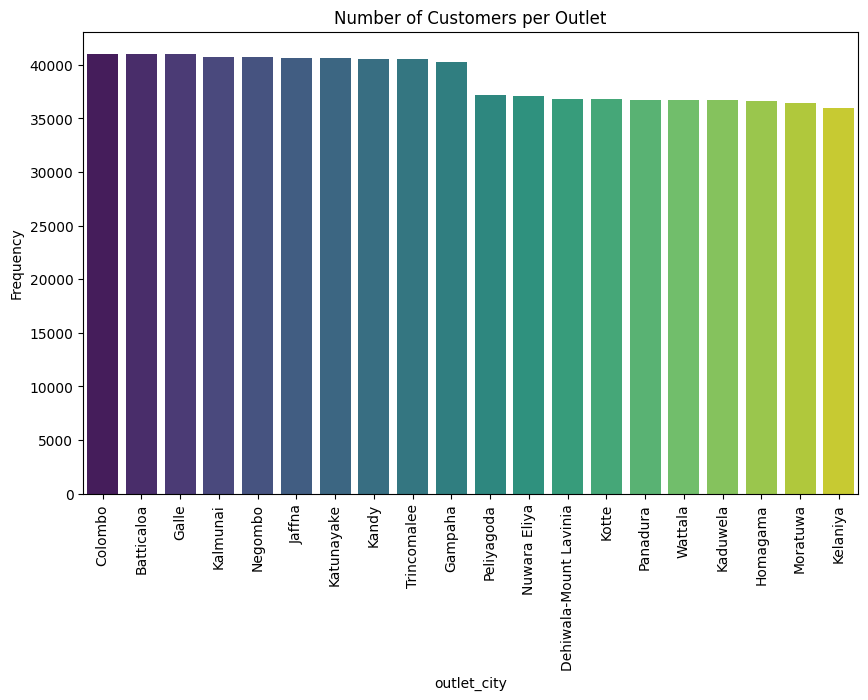

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['outlet_city'], order=data['outlet_city'].value_counts().index, palette='viridis')
plt.xlabel('outlet_city')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title("Number of Customers per Outlet")
plt.show()

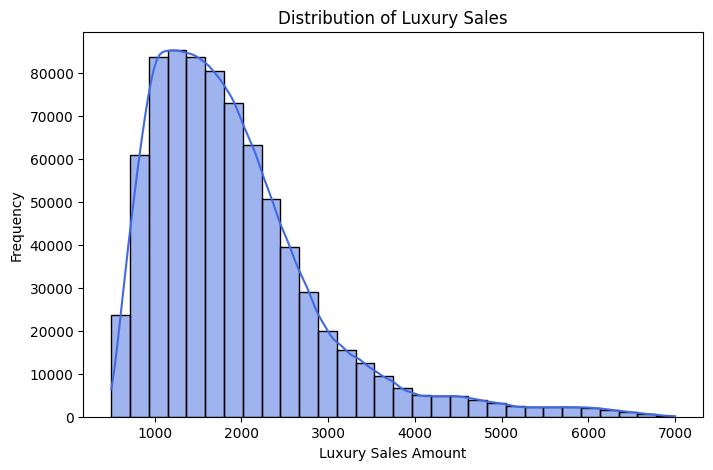

In [12]:
plt.figure(figsize=(8, 5))
luxury_sales_numeric = pd.to_numeric(data['luxury_sales'], errors='coerce')
sns.histplot(luxury_sales_numeric, bins=30, kde=True, color='royalblue', edgecolor='black')
plt.title('Distribution of Luxury Sales')
plt.xlabel('Luxury Sales Amount')
plt.ylabel('Frequency')
plt.show()

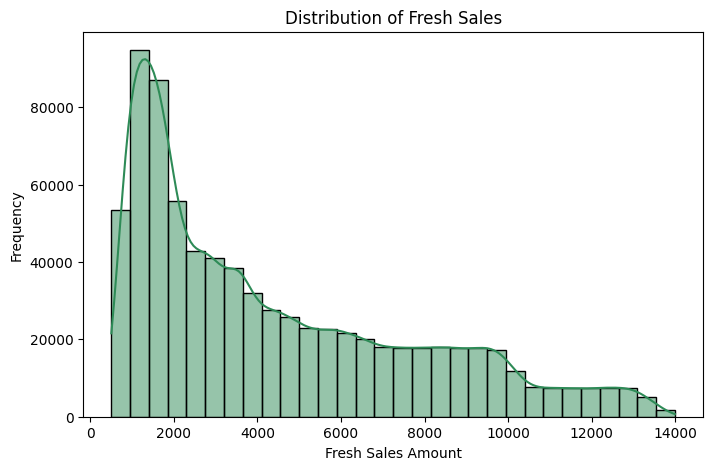

In [13]:
plt.figure(figsize=(8, 5))
fresh_sales_numeric = pd.to_numeric(data['fresh_sales'], errors='coerce')
sns.histplot(fresh_sales_numeric, bins=30, kde=True, color='seagreen', edgecolor='black')
plt.title('Distribution of Fresh Sales')
plt.xlabel('Fresh Sales Amount')
plt.ylabel('Frequency')
plt.show()

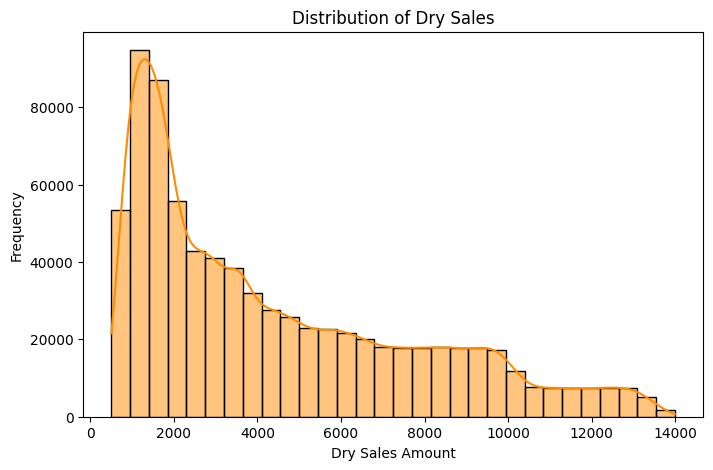

In [14]:
plt.figure(figsize=(8, 5))
dry_sales_numeric = pd.to_numeric(data['dry_sales'], errors='coerce')
sns.histplot(fresh_sales_numeric, bins=30, kde=True, color='darkorange', edgecolor='black')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales Amount")
plt.ylabel("Frequency")
plt.show()

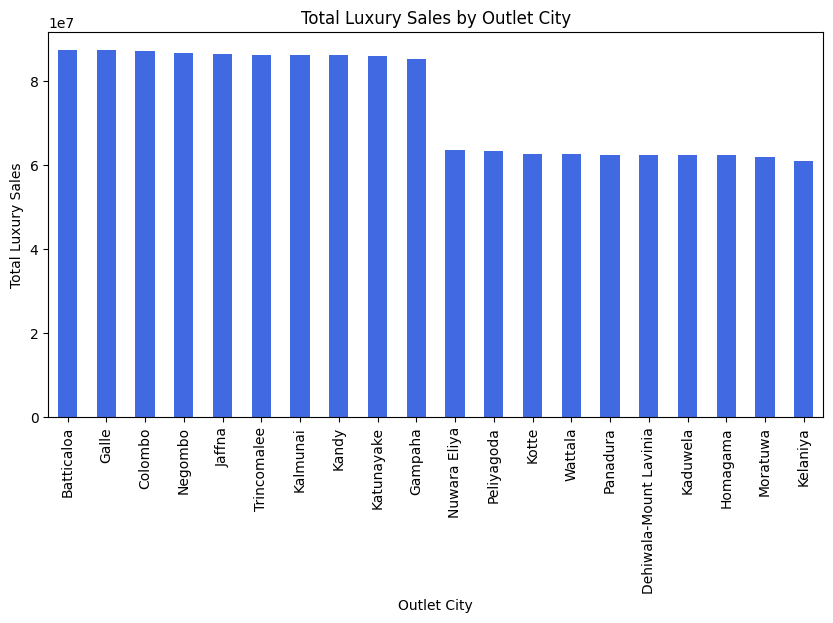

In [15]:
plt.figure(figsize=(10, 5))
data['luxury_sales'] = pd.to_numeric(data['luxury_sales'], errors='coerce')
city_sales = data.groupby("outlet_city")["luxury_sales"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='royalblue')

plt.title("Total Luxury Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Total Luxury Sales")
plt.xticks(rotation=90)
plt.show()

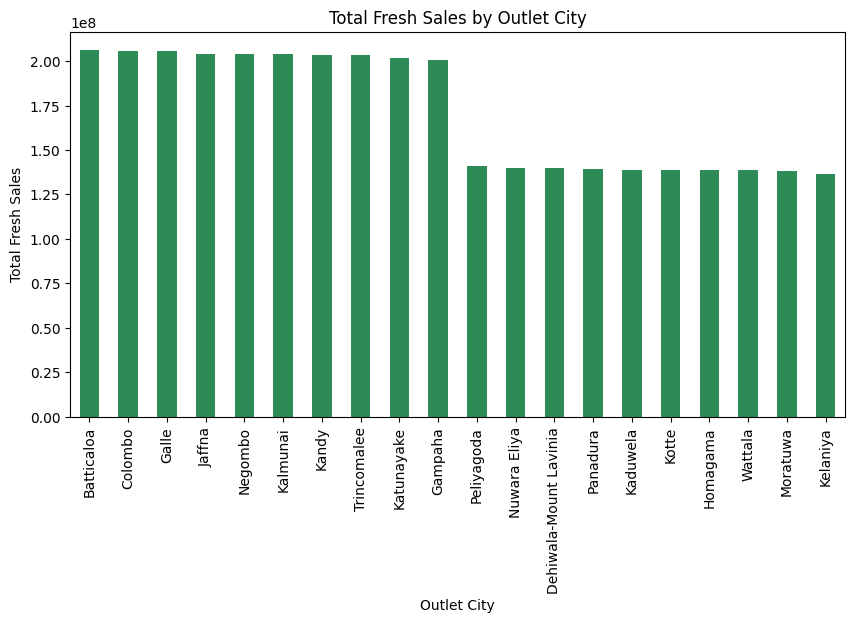

In [16]:
plt.figure(figsize=(10, 5))
data['fresh_sales'] = pd.to_numeric(data['fresh_sales'], errors='coerce')
city_sales = data.groupby("outlet_city")["fresh_sales"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='seagreen')

plt.title("Total Fresh Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Total Fresh Sales")
plt.xticks(rotation=90)
plt.show()

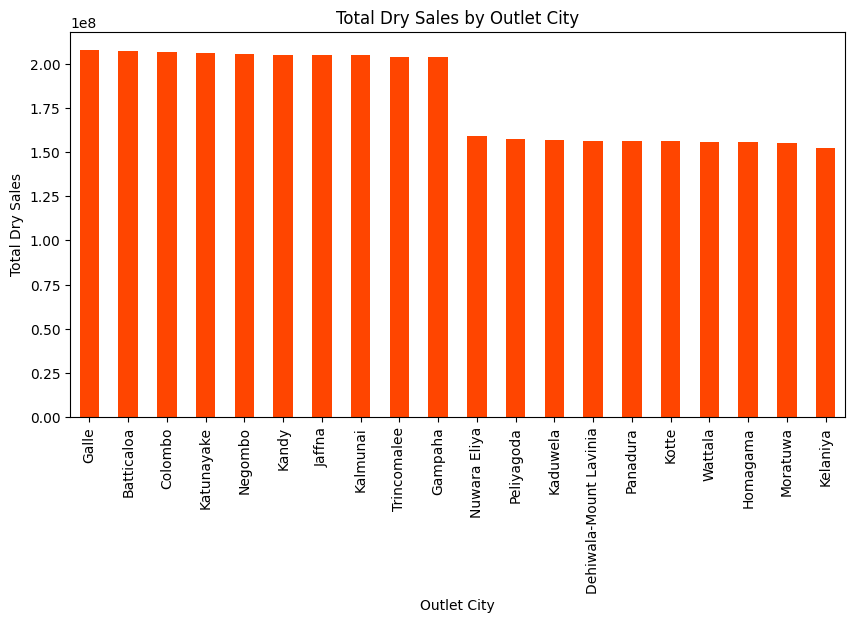

In [17]:
plt.figure(figsize=(10, 5))
data['dry_sales'] = pd.to_numeric(data['dry_sales'], errors='coerce')
city_sales = data.groupby("outlet_city")["dry_sales"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='orangered')

plt.title("Total Dry Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Total Dry Sales")
plt.xticks(rotation=90)
plt.show()

In [18]:
num_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']

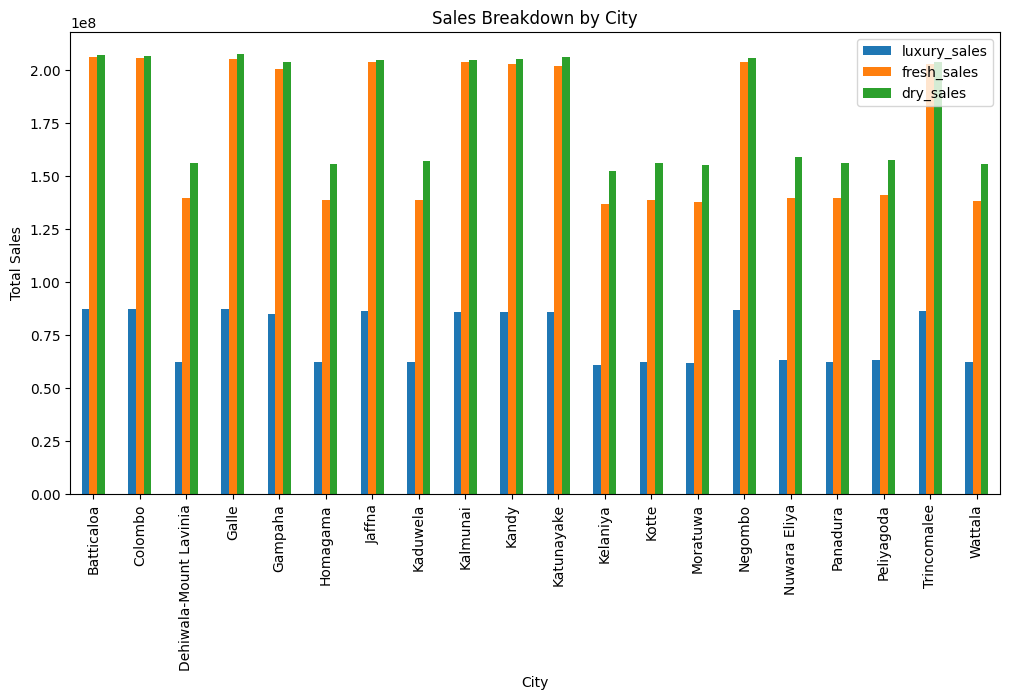

In [19]:
city_sales = data.groupby("outlet_city")[num_cols].sum()

city_sales.plot(kind='bar', figsize=(12, 6))
plt.title("Sales Breakdown by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

In [20]:
total_sales = data['luxury_sales'] + data['fresh_sales'] + data['dry_sales']
data['total_sales'] = total_sales

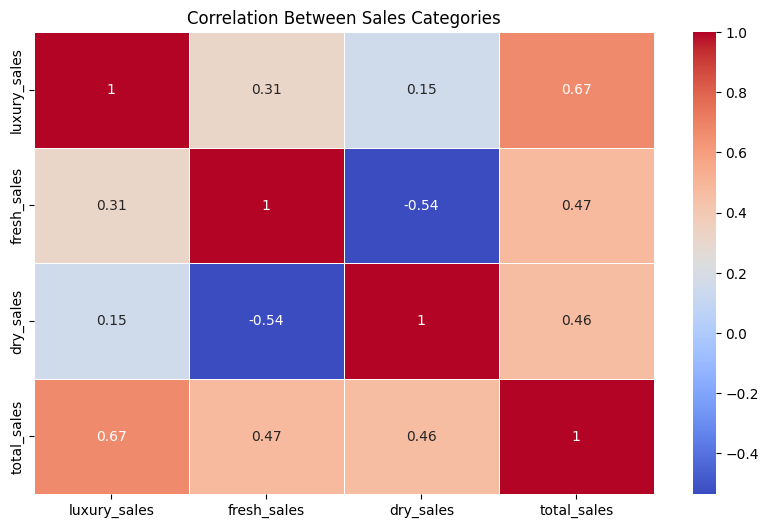

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Sales Categories")
plt.show()

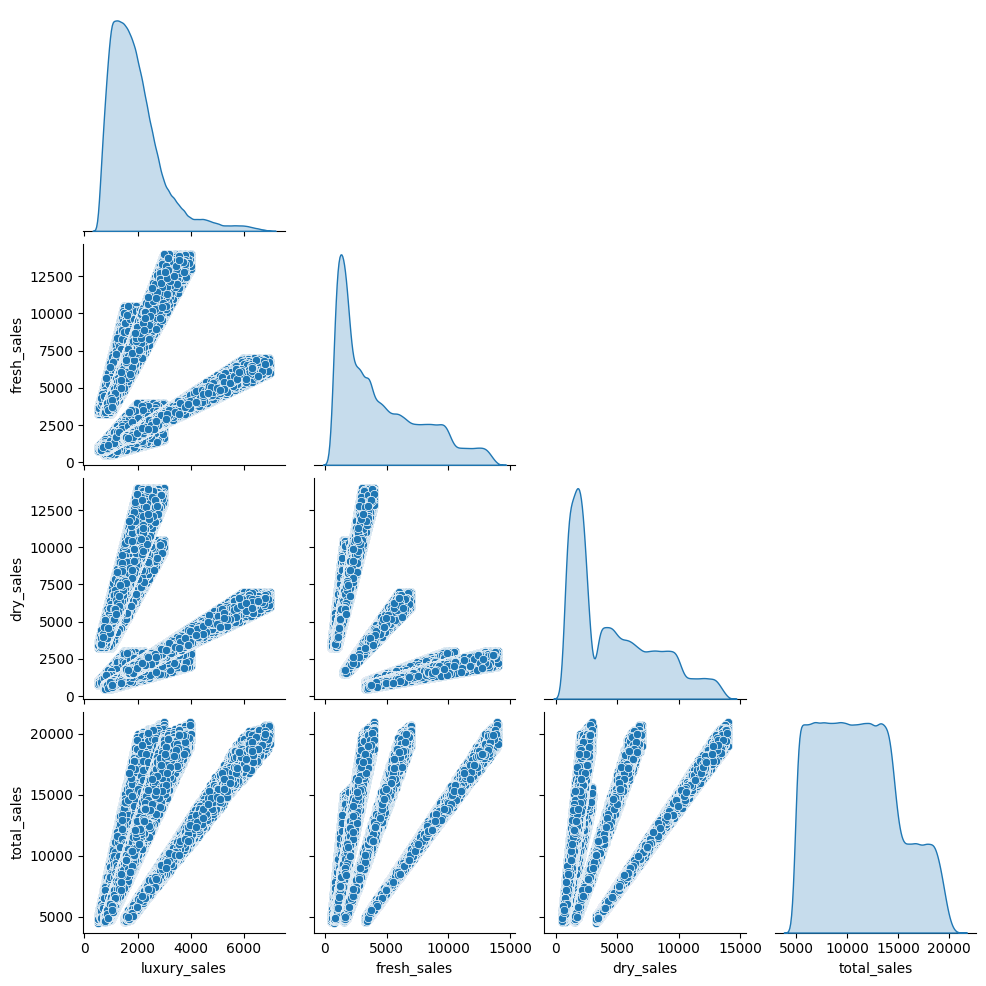

In [22]:
sns.pairplot(data[num_cols + ['total_sales']], diag_kind='kde', corner=True)
plt.show()